# Digit Recognition
Can you predict digits from handwritten pictures?

## Import data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science for Engineers/handwriting_digits.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [ ]:
y = df['label']
x = scale(df.drop(['label'], axis=1))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

## Visualize data

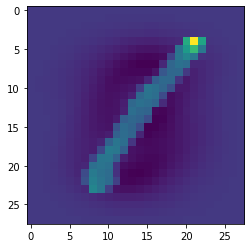

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x[0].reshape((28, 28)))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


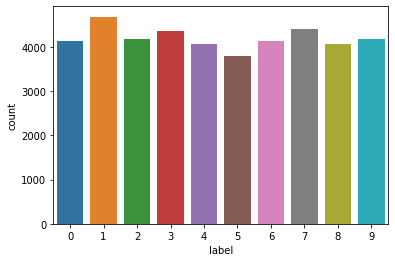

In [ ]:
import seaborn as sns
sns.countplot(y)

## Predict

In [ ]:
# Load data for scoring

x_score = scale(pd.read_csv('/content/drive/MyDrive/Data Science for Engineers/handwriting_digits_score.csv'))

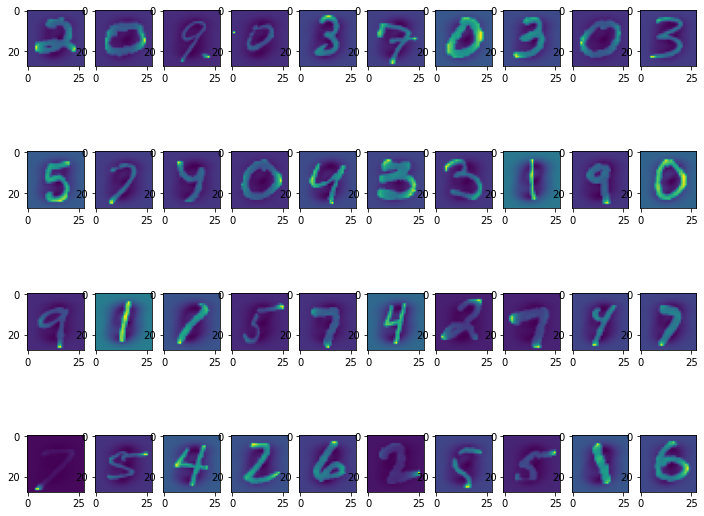

In [ ]:
# View handwritten images

plt.figure(figsize=(12,10))
col, row = 10, 4

for i in range(col*row):
  plt.subplot(row, col, i+1)
  plt.imshow(x_score[i].reshape((28, 28)))

plt.show()

### SVC

In [ ]:
%%time
from sklearn.svm import SVC

svc = SVC().fit(x_train, y_train)
pred = svc.predict(x_test)
print('Classification report (SVM): ')
print(classification_report(y_test, pred))

Classification report (SVM): 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       853
           1       0.98      0.99      0.98       940
           2       0.92      0.98      0.95       835
           3       0.96      0.94      0.95       873
           4       0.96      0.96      0.96       829
           5       0.96      0.95      0.95       731
           6       0.97      0.97      0.97       800
           7       0.94      0.97      0.96       850
           8       0.97      0.94      0.96       846
           9       0.96      0.93      0.94       843

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400

CPU times: user 3min 36s, sys: 238 ms, total: 3min 36s
Wall time: 3min 42s


### Neural network

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier().fit(x_train, y_train)
pred = clf.predict(x_test)
print('Classification report (CLF): ')
print(classification_report(y_test, pred))
print(clf.score(x_test, y_test))

Classification report (CLF): 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       853
           1       0.98      0.99      0.99       940
           2       0.97      0.97      0.97       835
           3       0.97      0.96      0.96       873
           4       0.98      0.97      0.97       829
           5       0.96      0.96      0.96       731
           6       0.98      0.99      0.98       800
           7       0.95      0.98      0.97       850
           8       0.97      0.95      0.96       846
           9       0.97      0.97      0.97       843

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

0.9716666666666667
CPU times: user 51.8 s, sys: 18.8 s, total: 1min 10s
Wall time: 41.5 s


In [ ]:
# Predict handwritten images for NN

for i in range(col*row):
  if np.mod(i, col)==0:
    print('\n')
  print(clf.predict(x_score)[i], end=' ')



2 0 9 9 3 7 0 3 0 3 

5 7 4 0 4 3 3 1 9 0 

9 1 1 5 7 4 2 7 4 7 

7 5 4 2 6 2 5 5 1 6 

### Deep neural network

In [ ]:
%%time
from sklearn.neural_network import MLPClassifier

dnn = MLPClassifier(hidden_layer_sizes=(100,100)).fit(x_train, y_train)
pred = dnn.predict(x_test)
print('Classification report (DNN): ')
print(classification_report(y_test, pred))
print(dnn.score(x_test, y_test))

Classification report (DNN): 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       853
           1       0.98      0.99      0.99       940
           2       0.97      0.96      0.97       835
           3       0.95      0.97      0.96       873
           4       0.96      0.98      0.97       829
           5       0.97      0.94      0.96       731
           6       0.98      0.99      0.98       800
           7       0.96      0.98      0.97       850
           8       0.97      0.96      0.97       846
           9       0.97      0.95      0.96       843

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

0.9696428571428571
CPU times: user 47.3 s, sys: 18.4 s, total: 1min 5s
Wall time: 39.7 s


## Cross validation

Cross validate models across 5 different test splits

In [ ]:
# Neural network
cross_val_score(clf, x, y, cv=5)

array([0.9677381 , 0.97285714, 0.96702381, 0.96714286, 0.97035714])

In [ ]:
# Deep neural network
cross_val_score(dnn, x, y, cv=5)

array([0.96904762, 0.97095238, 0.96880952, 0.96892857, 0.96869048])